<a href="https://www.kaggle.com/code/ibrahimfe/face-mask-classification-with-svm?scriptVersionId=154261566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-types-dataset/Dataset/test/n95/369.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/355.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/377.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/366.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/359.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/361.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/380.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/379.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/375.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/396.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/362.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/372.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/388.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/374.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/368.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [70]:
DATADIR = '/kaggle/input/face-mask-types-dataset/Dataset/train'
CATEGORIES = ['cloth', 'n95', 'n95v', 'nfm', 'srg']
IMG_SIZE = 300

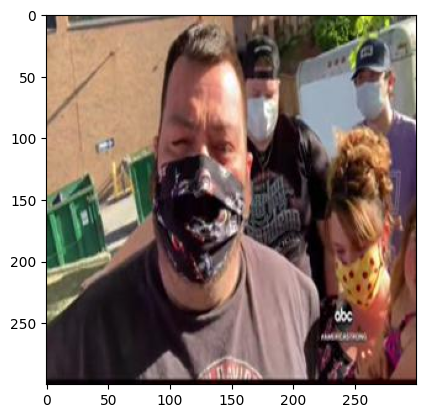

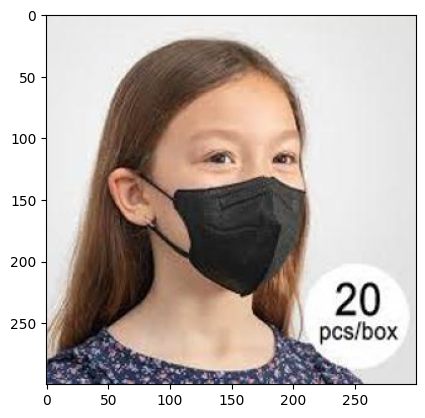

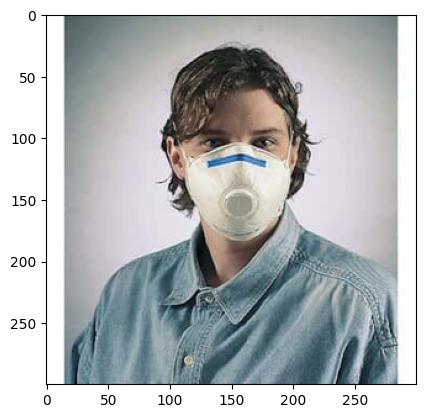

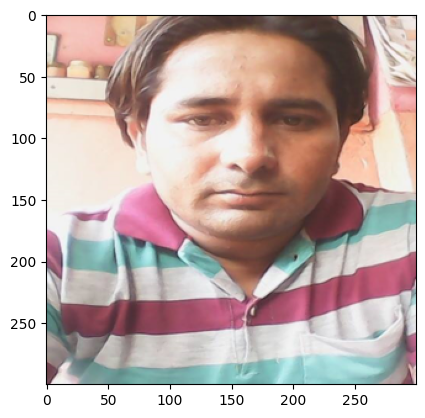

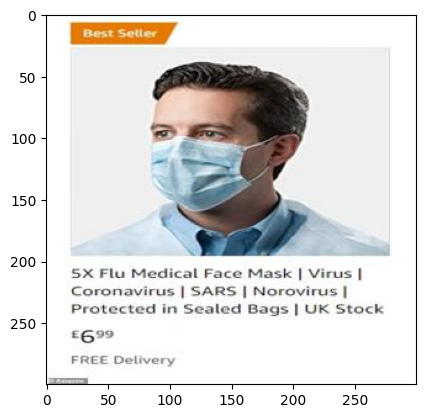

In [106]:
count = 0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    count += 1
    if count > 4:
        break

In [72]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
#                 img_array=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [73]:
print(len(training_data))

1956


In [74]:
lenofimage = len(training_data)

In [75]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [76]:
X.shape

(1956, 270000)

In [77]:
X = X/255.0

In [78]:
X[1]

array([0.23921569, 0.43921569, 0.45098039, ..., 0.77254902, 0.7372549 ,
       0.78823529])

In [79]:
y = np.array(y)

In [80]:
y.shape

(1956,)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [82]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Latih model SVM dengan data yang diperoleh
start_time = time.time()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)

end_time = time.time()

# Hitung lama waktu training
training_time = end_time - start_time
print("Training time: {} seconds".format(training_time))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.595 total time= 2.0min
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.622 total time= 1.9min
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.648 total time= 2.0min
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.635 total time= 1.9min
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.567 total time= 1.9min
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.333 total time= 3.9min
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.337 total time= 4.0min
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.341 total time= 4.0min
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.328 total time= 4.1min
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.355 total time= 4.0min
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.337 total time= 2.3min
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly

In [95]:
best_model = grid.best_estimator_
best_parameters = grid.best_params_
best_f1 = grid.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC(C=10)
The best parameter values were: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The best f1-score was: 0.6598778760651018


In [96]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [97]:
best_model

SVC(C=10)

In [98]:
y2 = best_model.predict(X_test)
y = best_model.predict(X_train)

In [99]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(y_test,y2))
print("Accuracy is", accuracy_score(y_train, y))

Accuracy is 0.6707566462167689
Accuracy is 0.9993183367416496


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.62      0.56      0.58        90
           1       0.67      0.66      0.67       101
           2       0.65      0.68      0.66        97
           3       0.82      0.89      0.85       119
           4       0.51      0.48      0.49        82

    accuracy                           0.67       489
   macro avg       0.65      0.65      0.65       489
weighted avg       0.67      0.67      0.67       489



In [101]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

result

,original,predicted
0,1,1
1,4,3
2,0,3
3,0,0
4,1,1
...,...,...
484,4,4
485,3,3
486,3,3
487,2,2


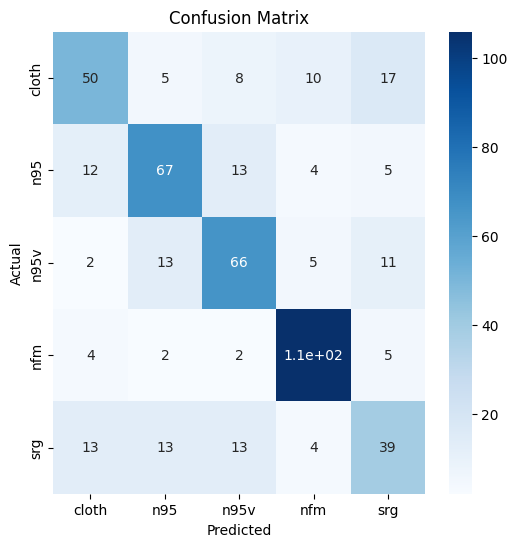

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

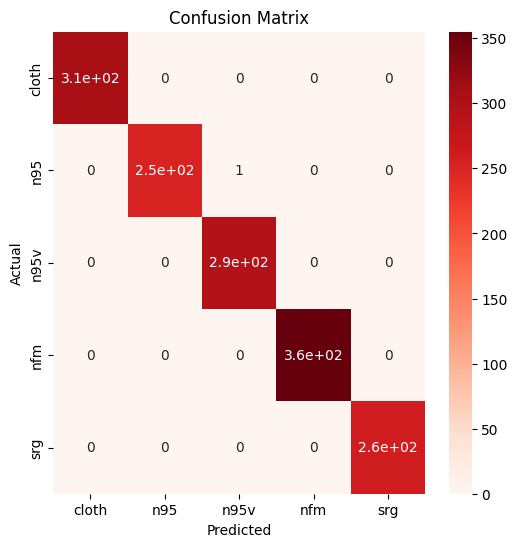

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()